## Sequence Prediction using RNN

In this exercise, we try to predict values of a curve given earlier data points.

We will formulate our problem like this – given a sequence of 50 numbers belonging to a sine wave, predict the 51st number in the series

In [4]:
!pip install keras tensorflow
#!pip install keras tensorflow==1.5

You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
!pip install --upgrade numpy

Requirement already up-to-date: numpy in /sgoinfre/goinfre/Perso/aslusarc/anaconda3/lib/python3.6/site-packages (1.16.3)
You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model      # type de modele
from keras.layers import Dense                       # Fully Connected Layers
from keras.optimizers import Adam
from keras import layers
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

%pylab inline
import math

Populating the interactive namespace from numpy and matplotlib


What does our network model expect the data to be like? It would accept a single sequence of length 50 as input. So the shape of the input data will be:

(number_of_records x length_of_sequence x types_of_sequences)

Here, types_of_sequences is 1, because we have only one type of sequence – the sine wave.

On the other hand, the output would have only one value for each record. This will of course be the 51st value in the input sequence. So its shape would be:

(number_of_records x types_of_sequences) # where types_of_sequences is 1

-----------------------------------

fix random seed for reproducibility of the results (hint: `random`)

In [7]:
from pprint import pprint

In [8]:
# fix random seed for reproducibility (may not be necessary with Keras?)
r = random.seed(42)
print(random.random)

<built-in method random_sample of mtrand.RandomState object at 0x118d8e630>


Create the sine wave data and visualize it (hint: `math.sin(x)` for values ranging from 0 to 200)

Data should be stored in a numpy array of 200 values.

In [9]:
l= list(range(0,201))
print(l)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]


In [10]:
sin_wave = []
for i in range(0, 200) :
    sin_wave.append(math.sin(i))
    
print(sin_wave)

[0.0, 0.8414709848078965, 0.9092974268256817, 0.1411200080598672, -0.7568024953079282, -0.9589242746631385, -0.27941549819892586, 0.6569865987187891, 0.9893582466233818, 0.4121184852417566, -0.5440211108893699, -0.9999902065507035, -0.5365729180004349, 0.4201670368266409, 0.9906073556948704, 0.6502878401571169, -0.2879033166650653, -0.9613974918795568, -0.750987246771676, 0.14987720966295234, 0.9129452507276277, 0.836655638536056, -0.008851309290403876, -0.8462204041751706, -0.9055783620066239, -0.13235175009777303, 0.7625584504796028, 0.956375928404503, 0.27090578830786904, -0.6636338842129675, -0.9880316240928618, -0.404037645323065, 0.5514266812416906, 0.9999118601072672, 0.5290826861200238, -0.428182669496151, -0.9917788534431158, -0.6435381333569994, 0.2963685787093853, 0.9637953862840878, 0.7451131604793488, -0.158622668804709, -0.9165215479156338, -0.8317747426285983, 0.017701925105413577, 0.8509035245341184, 0.9017883476488092, 0.123573122745224, -0.7682546613236668, -0.9537526

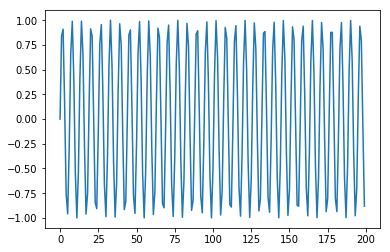

In [11]:

plt.plot(sin_wave)

Visualize a sequence of only 50, for example the 50 first values of the calculated sine wave.

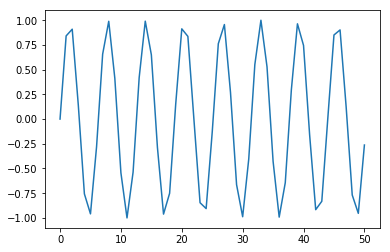

In [12]:
plt.plot(sin_wave[:51])

We will first set up the training data:

X should be an array of 100 sequences, that is, an array of arrays.

Y should be an array of 100 outputs, that is, for each input sequence, the value that follows the sequence.

hint: `X.append`, `Y.append`

Note that we loop for `num_records – 50` because we want to set aside the last 50 records as our validation data. 

In [13]:
X = []
Y = []

seq_len = 50
num_records = len(sin_wave) - seq_len
print(num_records)
for i in range(num_records - 50):
    X.append(sin_wave[i: i+seq_len])
    Y.append(sin_wave[i+seq_len])



150


In [14]:
print(X[:2])

[[0.0, 0.8414709848078965, 0.9092974268256817, 0.1411200080598672, -0.7568024953079282, -0.9589242746631385, -0.27941549819892586, 0.6569865987187891, 0.9893582466233818, 0.4121184852417566, -0.5440211108893699, -0.9999902065507035, -0.5365729180004349, 0.4201670368266409, 0.9906073556948704, 0.6502878401571169, -0.2879033166650653, -0.9613974918795568, -0.750987246771676, 0.14987720966295234, 0.9129452507276277, 0.836655638536056, -0.008851309290403876, -0.8462204041751706, -0.9055783620066239, -0.13235175009777303, 0.7625584504796028, 0.956375928404503, 0.27090578830786904, -0.6636338842129675, -0.9880316240928618, -0.404037645323065, 0.5514266812416906, 0.9999118601072672, 0.5290826861200238, -0.428182669496151, -0.9917788534431158, -0.6435381333569994, 0.2963685787093853, 0.9637953862840878, 0.7451131604793488, -0.158622668804709, -0.9165215479156338, -0.8317747426285983, 0.017701925105413577, 0.8509035245341184, 0.9017883476488092, 0.123573122745224, -0.7682546613236668, -0.953752

In [15]:
for i in range (0,30 ) :
    print(str(X[i]), " -> ", str(Y[i]))
    

[0.0, 0.8414709848078965, 0.9092974268256817, 0.1411200080598672, -0.7568024953079282, -0.9589242746631385, -0.27941549819892586, 0.6569865987187891, 0.9893582466233818, 0.4121184852417566, -0.5440211108893699, -0.9999902065507035, -0.5365729180004349, 0.4201670368266409, 0.9906073556948704, 0.6502878401571169, -0.2879033166650653, -0.9613974918795568, -0.750987246771676, 0.14987720966295234, 0.9129452507276277, 0.836655638536056, -0.008851309290403876, -0.8462204041751706, -0.9055783620066239, -0.13235175009777303, 0.7625584504796028, 0.956375928404503, 0.27090578830786904, -0.6636338842129675, -0.9880316240928618, -0.404037645323065, 0.5514266812416906, 0.9999118601072672, 0.5290826861200238, -0.428182669496151, -0.9917788534431158, -0.6435381333569994, 0.2963685787093853, 0.9637953862840878, 0.7451131604793488, -0.158622668804709, -0.9165215479156338, -0.8317747426285983, 0.017701925105413577, 0.8509035245341184, 0.9017883476488092, 0.123573122745224, -0.7682546613236668, -0.9537526

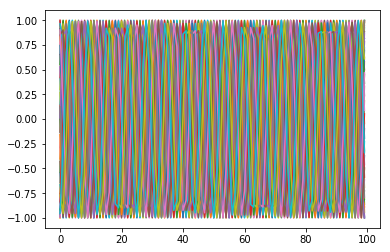

In [16]:
plt.plot(X)

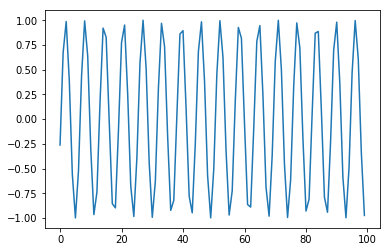

In [17]:
plt.plot(Y)

If we plot the data we can check that X(t) is Y(t-1)

Print the shape of the data: 

X should be an array of 100 sequences of 50.

Y should be an array of 100 values.

hint: `shape`

In [18]:
X = np.array(X)
print(X.shape)

(100, 50)


In [19]:
Y = np.array(Y)
print(Y.shape)

(100,)


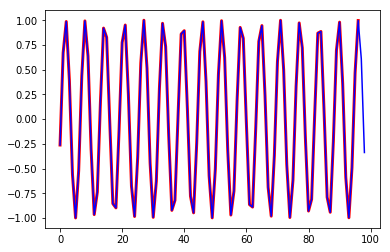

In [20]:
plt.plot( X[1:98,49], 'r' , linewidth=3)
plt.plot( Y[0:99], 'b')

We reshape the data because we need one more dimension for the model

In [21]:
X = X.reshape(1, 100, 50)
Y = Y.reshape(1, 100)

In [22]:
print(X.shape)
print(Y.shape)

(1, 100, 50)
(1, 100)


Now we can instantiate a Keras model:

In [25]:
#definition of the model
model = Sequential()
model.add(LSTM(units = 3,input_shape=(None, 50)))
model.add(Dense(100))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3)                 648       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               400       
Total params: 1,048
Trainable params: 1,048
Non-trainable params: 0
_________________________________________________________________


Then we can test the model with only 20 iterations:

In [26]:
model.fit(X, Y, epochs=20, batch_size=1 )

Epoch 1/20
1/1 [==============================] - 0s 382ms/step - loss: 0.5116
Epoch 2/20
1/1 [==============================] - 0s 56ms/step - loss: 0.5084
Epoch 3/20
1/1 [==============================] - 0s 55ms/step - loss: 0.5054
Epoch 4/20
1/1 [==============================] - 0s 54ms/step - loss: 0.5029
Epoch 5/20
1/1 [==============================] - 0s 55ms/step - loss: 0.5001
Epoch 6/20
1/1 [==============================] - 0s 55ms/step - loss: 0.4976
Epoch 7/20
1/1 [==============================] - 0s 67ms/step - loss: 0.4952
Epoch 8/20
1/1 [==============================] - 0s 57ms/step - loss: 0.4929
Epoch 9/20
1/1 [==============================] - 0s 54ms/step - loss: 0.4908
Epoch 10/20
1/1 [==============================] - 0s 55ms/step - loss: 0.4888
Epoch 11/20
1/1 [==============================] - 0s 55ms/step - loss: 0.4869
Epoch 12/20
1/1 [==============================] - 0s 56ms/step - loss: 0.4851
Epoch 13/20
1/1 [==============================] - 0s 56ms/s

Get the predictions and plot them.

Hint `model.predict`

(1, 100)


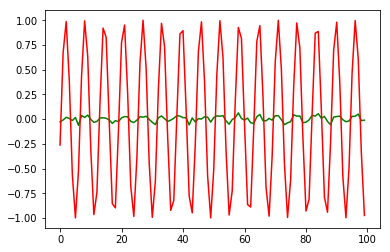

In [27]:
prediction = model.predict(X)
print(shape(prediction))
plt.plot(prediction[0,:], 'g')
plt.plot(Y[0,:] , 'r')
plt.show()

We can see that the model is learning, but we need more iterations for a better fit.

Test the model with 500 epochs.

In [28]:
model.fit(X, Y, epochs=500, batch_size=1 )

Epoch 1/500
1/1 [==============================] - 0s 60ms/step - loss: 0.4716
Epoch 2/500
1/1 [==============================] - 0s 56ms/step - loss: 0.4701
Epoch 3/500
1/1 [==============================] - 0s 57ms/step - loss: 0.4686
Epoch 4/500
1/1 [==============================] - 0s 61ms/step - loss: 0.4670
Epoch 5/500
1/1 [==============================] - 0s 60ms/step - loss: 0.4654
Epoch 6/500
1/1 [==============================] - 0s 61ms/step - loss: 0.4637
Epoch 7/500
1/1 [==============================] - 0s 61ms/step - loss: 0.4620
Epoch 8/500
1/1 [==============================] - 0s 59ms/step - loss: 0.4603
Epoch 9/500
1/1 [==============================] - 0s 60ms/step - loss: 0.4585
Epoch 10/500
1/1 [==============================] - 0s 59ms/step - loss: 0.4567
Epoch 11/500
1/1 [==============================] - 0s 59ms/step - loss: 0.4548
Epoch 12/500
1/1 [==============================] - 0s 57ms/step - loss: 0.4529
Epoch 13/500
1/1 [==============================]

Epoch 104/500
1/1 [==============================] - 0s 55ms/step - loss: 0.1146
Epoch 105/500
1/1 [==============================] - 0s 56ms/step - loss: 0.1124
Epoch 106/500
1/1 [==============================] - 0s 55ms/step - loss: 0.1103
Epoch 107/500
1/1 [==============================] - 0s 55ms/step - loss: 0.1082
Epoch 108/500
1/1 [==============================] - 0s 55ms/step - loss: 0.1062
Epoch 109/500
1/1 [==============================] - 0s 55ms/step - loss: 0.1041
Epoch 110/500
1/1 [==============================] - 0s 55ms/step - loss: 0.1022
Epoch 111/500
1/1 [==============================] - 0s 56ms/step - loss: 0.1003
Epoch 112/500
1/1 [==============================] - 0s 54ms/step - loss: 0.0984
Epoch 113/500
1/1 [==============================] - 0s 54ms/step - loss: 0.0966
Epoch 114/500
1/1 [==============================] - 0s 55ms/step - loss: 0.0948
Epoch 115/500
1/1 [==============================] - 0s 57ms/step - loss: 0.0930
Epoch 116/500
1/1 [=========

1/1 [==============================] - 0s 55ms/step - loss: 0.0178
Epoch 206/500
1/1 [==============================] - 0s 54ms/step - loss: 0.0174
Epoch 207/500
1/1 [==============================] - 0s 55ms/step - loss: 0.0171
Epoch 208/500
1/1 [==============================] - 0s 55ms/step - loss: 0.0168
Epoch 209/500
1/1 [==============================] - 0s 54ms/step - loss: 0.0165
Epoch 210/500
1/1 [==============================] - 0s 56ms/step - loss: 0.0162
Epoch 211/500
1/1 [==============================] - 0s 56ms/step - loss: 0.0159
Epoch 212/500
1/1 [==============================] - 0s 55ms/step - loss: 0.0156
Epoch 213/500
1/1 [==============================] - 0s 56ms/step - loss: 0.0153
Epoch 214/500
1/1 [==============================] - 0s 55ms/step - loss: 0.0151
Epoch 215/500
1/1 [==============================] - 0s 56ms/step - loss: 0.0148
Epoch 216/500
1/1 [==============================] - 0s 55ms/step - loss: 0.0145
Epoch 217/500
1/1 [=======================

Epoch 307/500
1/1 [==============================] - 0s 55ms/step - loss: 0.0026
Epoch 308/500
1/1 [==============================] - 0s 56ms/step - loss: 0.0026
Epoch 309/500
1/1 [==============================] - 0s 55ms/step - loss: 0.0025
Epoch 310/500
1/1 [==============================] - 0s 55ms/step - loss: 0.0025
Epoch 311/500
1/1 [==============================] - 0s 54ms/step - loss: 0.0025
Epoch 312/500
1/1 [==============================] - 0s 55ms/step - loss: 0.0024
Epoch 313/500
1/1 [==============================] - 0s 55ms/step - loss: 0.0024
Epoch 314/500
1/1 [==============================] - 0s 54ms/step - loss: 0.0023
Epoch 315/500
1/1 [==============================] - 0s 55ms/step - loss: 0.0023
Epoch 316/500
1/1 [==============================] - 0s 56ms/step - loss: 0.0022
Epoch 317/500
1/1 [==============================] - 0s 58ms/step - loss: 0.0022
Epoch 318/500
1/1 [==============================] - 0s 55ms/step - loss: 0.0021
Epoch 319/500
1/1 [=========

Epoch 406/500
1/1 [==============================] - 0s 55ms/step - loss: 3.9451e-04
Epoch 407/500
1/1 [==============================] - 0s 54ms/step - loss: 3.8689e-04
Epoch 408/500
1/1 [==============================] - 0s 57ms/step - loss: 3.7942e-04
Epoch 409/500
1/1 [==============================] - 0s 54ms/step - loss: 3.7209e-04
Epoch 410/500
1/1 [==============================] - 0s 55ms/step - loss: 3.6491e-04
Epoch 411/500
1/1 [==============================] - 0s 55ms/step - loss: 3.5786e-04
Epoch 412/500
1/1 [==============================] - 0s 55ms/step - loss: 3.5094e-04
Epoch 413/500
1/1 [==============================] - 0s 54ms/step - loss: 3.4415e-04
Epoch 414/500
1/1 [==============================] - 0s 55ms/step - loss: 3.3750e-04
Epoch 415/500
1/1 [==============================] - 0s 55ms/step - loss: 3.3097e-04
Epoch 416/500
1/1 [==============================] - 0s 54ms/step - loss: 3.2457e-04
Epoch 417/500
1/1 [==============================] - 0s 55ms/step

Plot the new predictions: there should be a better fit now:

(1, 100)


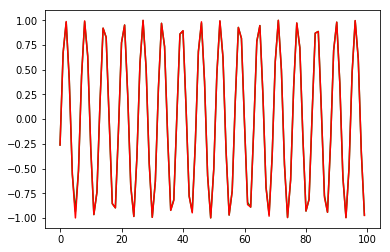

In [36]:
train_prediction = model.predict(X)
print(shape(train_prediction))
plt.plot(train_prediction[0,:], 'g')
plt.plot(Y[0,:] , 'r')
plt.show()

#### Now, in a similar way to what we did with the training data, we setup the validation data:



In [51]:
X_val = []
Y_val = []

for i in range(num_records - 50, num_records):
    X_val.append(sin_wave[i:(i+seq_len)])
    Y_val.append(sin_wave[i+seq_len])

#T = 50                   # length of sequence

#output_dim = 1



In [52]:
X_val = np.array(X_val)
Y_val = np.array(Y_val)
X_val.shape, Y_val.shape

((50, 50), (50,))

In [53]:
X_val = X_val.reshape(1, 50, 50)
Y_val = Y_val.reshape(1, 50)
print(X_val.shape)
print(Y_val.shape)

(1, 50, 50)
(1, 50)


Now, instead of working with training data, we can make predictions on the validation data:

In [57]:
# make predictions
val_prediction = model.predict(X_val)
print(shape(val_prediction))


(1, 100)


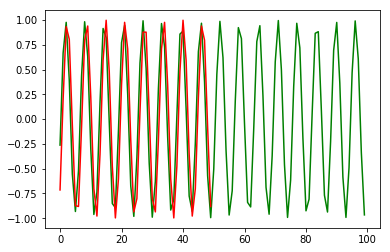

In [58]:
plt.plot(val_prediction[0,:], 'g')
plt.plot(Y_val[0,:] , 'r')
plt.show()

### Calculate root mean squared error for the training and the validation data.

We expect the error to be very low on the training data, and a bit less low for the validation data.

Hint: `sklearn.metrics.mean_squared_error`

In [48]:
# calculate root mean squared error
train_Score = mean_squared_error(Y, train_prediction)
print('Train Score: %.2f RMSE' % (train_Score))


Train Score: 0.00 RMSE


In [65]:
validation_Score = mean_squared_error(Y_val, val_prediction[:,0:50])
print('Test Score: %.2f RMSE' % (validation_Score))

Test Score: 0.14 RMSE


We plot the validation data to check if there is overfitting

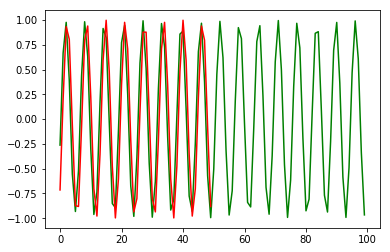

In [67]:
plt.plot(val_prediction[0,:], 'g')
plt.plot(Y_val[0,:] , 'r')
plt.show()

Great that's look pretty good....We can check with a clean model and less epochs and see....

Could also try with a different series, for example a square wave?

In [68]:
#definition of the model
model = Sequential()
model.add(LSTM(units = 3,input_shape=(50,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 3)                 60        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.fit(X, Y, epochs=20, batch_size=1 )

ValueError: Error when checking input: expected lstm_3_input to have shape (50, 1) but got array with shape (100, 50)